# Yet another COVID testing analysis

## Introduction
Welcome to the first healthcare project: **COVID testing analysis**. In this project, we will be working with a dataset of COVID-19 cases and deaths across various countries over time. The first task of the project will be carried out in MySQL, and the other three tasks in Python.

### Objectives
1. Data cleaning with SQL
    - Identify the latest date in the dataset
    - Determine the top 10 countries with the highest total cases on this latest date
    - Filter the dataset to include all records from these top 10 countries, covering the entire period up to the latest date

2. Analyze the trend of new COVID-19 cases over time for the top 10 countries

3. Comparative analysis of the cumulative death rate of COVID-19

4. Analyze the distribution of new COVID-19 cases among the top 10 countries

#### 1. Data cleaning with SQL

In [ ]:
-- filter the dataset to include all records from the top 10 countries
-- with the highest total cases, and covering the entire period up to the latest date
WITH top_ten_countries AS (
    SELECT iso_code
    FROM covid_testing
    WHERE date = (SELECT MAX(date) FROM covid_testing)
    ORDER BY total_cases DESC
    LIMIT 10
)
SELECT *
FROM covid_testing
WHERE iso_code IN (SELECT iso_code FROM top_ten_countries)
  AND date <= (SELECT MAX(date) FROM covid_testing);

#### 2. Analyze the trend of new COVID-19 cases over time for the top 10 countries

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extract the data from the CSV file
df = pd.read_csv('D:/Programming/pydir/Apps/tutorial/covid_testing/covid_testing_filtered.csv')

In [ ]:
df.info()
df.describe()

In [3]:
# Load the raw data and clean it using Python
file_path = 'D:/Programming/pydir/Apps/tutorial/covid_testing/covid_testing.csv'
df_raw = pd.read_csv(file_path)

# Convert the date column to datetime format
df_raw['date'] = pd.to_datetime(df_raw['date'])

# Get the latest date in the dataset
latest_date = df_raw['date'].max()

# Identify the top 10 countries by total cases on the latest date
top_countries = df_raw[df_raw['date'] == latest_date].nlargest(10, 'total_cases')['iso_code'].tolist()

# Filter the dataset to include only the top 10 countries
filtered_df = df_raw[df_raw['iso_code'].isin(top_countries)]

# Remove 'World' and 'International' from the location column
filtered_df = filtered_df[~filtered_df['location'].isin(['World', 'International'])]


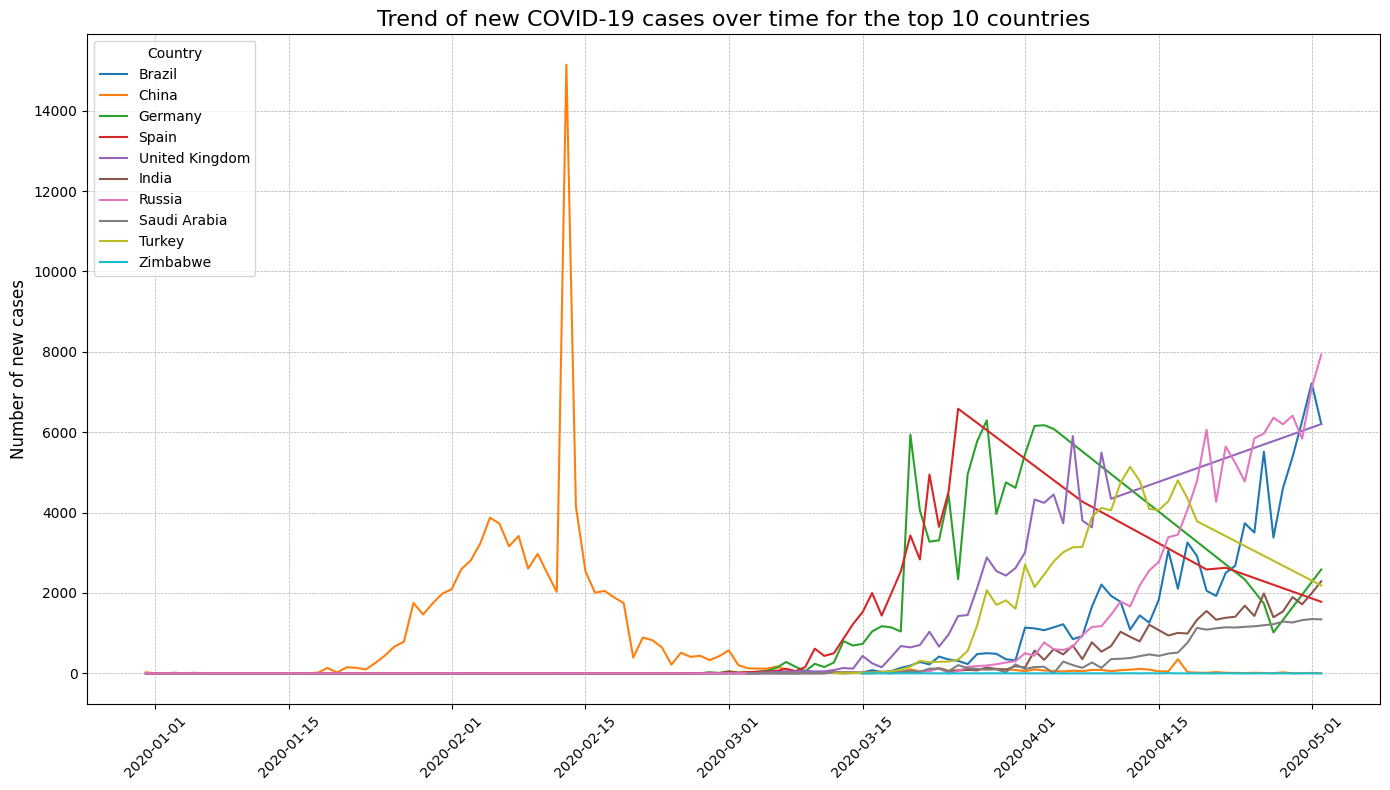

In [71]:
# Plot the trend of new COVID-19 cases over time for the top 10 countries
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_df,
    x='date',
    y='new_cases',
    hue='location',
    palette="tab10"
)

# Add title and labels
plt.title('Trend of new COVID-19 cases over time for the top 10 countries', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of new cases', fontsize=12)

# Customize legend and ticks
plt.legend(title='Country', loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid and adjust layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

#### 3. Comparative analysis of the cumulative death rate of COVID-19

Tasks
- For the latest date, calculate the cumulative death rate for each of the top 10 countries. The cumulative death rate is defined as the total number of deaths divided by the total number of cases.
- Handle any missing or zero values appropriately to ensure accurate calculations.


In [4]:
# Calculate the cumulative death rate (total deaths per total cases) for the latest date
latest_data = filtered_df[filtered_df['date'] == latest_date].copy()
latest_data['death_rate'] = round((latest_data['total_deaths'] / latest_data['total_cases']) * 100, 2)
latest_data['death_rate'] = latest_data['death_rate'].fillna(0)

# Sort data by death rate for better visualization
ordered_df = latest_data.sort_values(['death_rate'], ascending=[False])

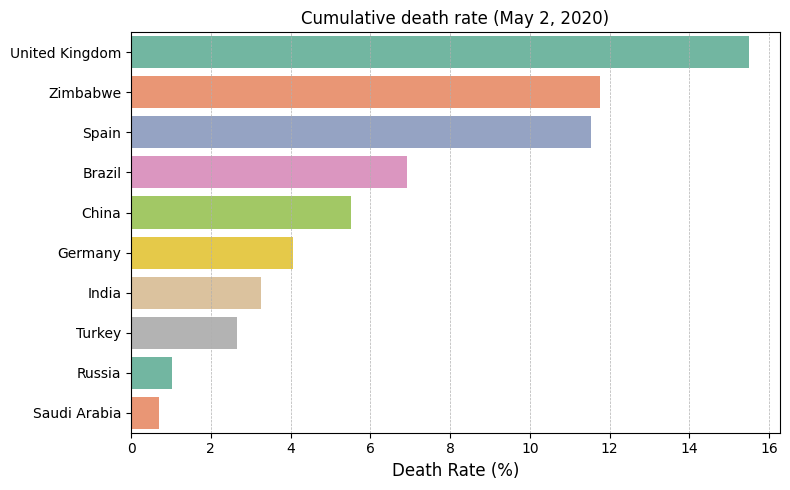

In [7]:
# Create a horizontal bar chart to visualize the cumulative death rate for the top 10 countries on the latest date
plt.figure(figsize=(8, 5))
sns.barplot(
    data=ordered_df,
    x='death_rate',
    y='location',
    hue='location',
    palette="Set2",
    errorbar=None
)

# Add labels and title
plt.title('Cumulative death rate (May 2, 2020)')
plt.xlabel('Death Rate (%)', fontsize=12)
plt.ylabel('')

# Adjust ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add grid and adjust layout
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [134]:
# Replicate the plot using plotly for interactivity
import plotly.express as px
import plotly.graph_objects as go

# Get Set2 color palette from seaborn
colors = sns.color_palette("Set2", n_colors=10).as_hex()

# Create the horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=ordered_df['location'],
    x=ordered_df['death_rate'],
    orientation='h',
    marker_color=colors,
    hovertemplate='%{y}: %{x:.2f}%<extra></extra>'  # Add percent sign and format to 2 decimal places
))

# Update layout
fig.update_layout(
    title='Cumulative death rate for the top 10 countries (May 2, 2020)',
    xaxis_title='Death rate (%)',
    yaxis_title='',
    yaxis={'categoryorder': 'total ascending'},
    height=600,
    width=900,
    template='plotly_white'
)

# Add gridlines only for x-axis
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=False)

# Show the figure
fig.show()

# If you want to save it
fig.write_html("covid_death_rates.html")

For an interactive plot of cumulative cases [here](https://htmlpreview.github.io/?https://github.com/PanosChatzi/Workearly_Projects/blob/main/covid_testing/covid_death_rates.html)

#### 4. Analyze the distribution of new COVID-19 cases

In [137]:
# Calculate the total number of new cases for each of the top 10 countries over the entire period
total_new_cases = filtered_df.groupby('location')['new_cases'].sum().reset_index()
total_new_cases = total_new_cases.sort_values('new_cases', ascending=False)

# Calculate the percentage of the total new cases that each country represents
total_new_cases['percentage'] = round((total_new_cases['new_cases'] / total_new_cases['new_cases'].sum()) * 100, 2)
total_new_cases.head(10)


,location,new_cases,percentage
4,Russia,114431,17.56
2,Germany,93454,14.34
0,Brazil,91589,14.06
7,Turkey,84517,12.97
1,China,83959,12.88
8,United Kingdom,71278,10.94
6,Spain,50939,7.82
3,India,37336,5.73
5,Saudi Arabia,24097,3.70
9,Zimbabwe,34,0.01


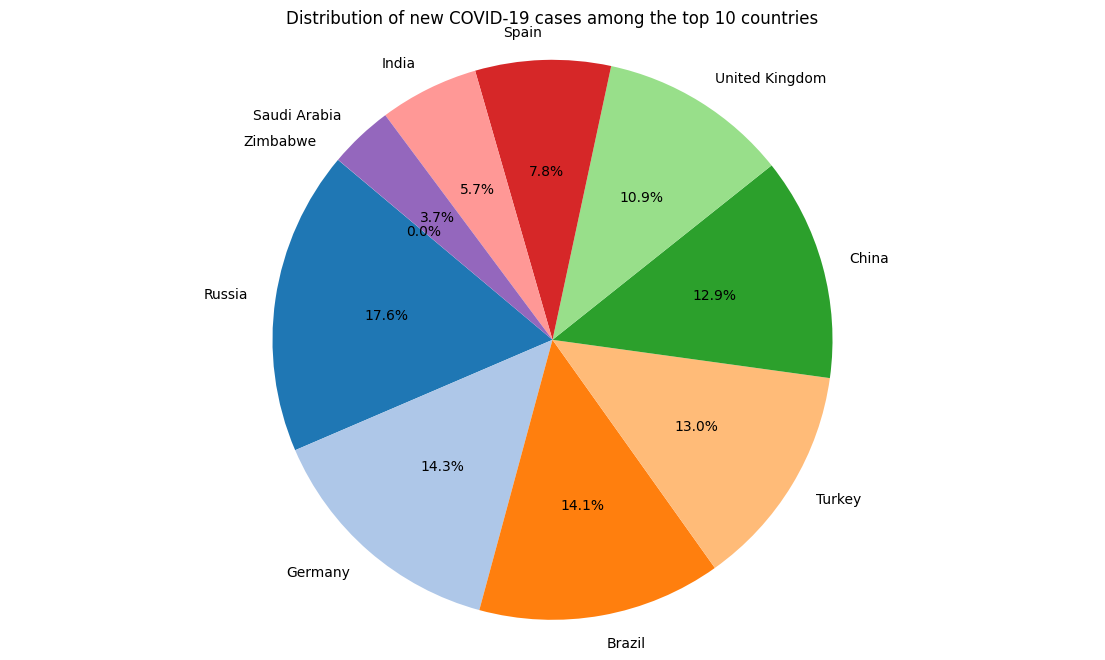

In [138]:
# Plot a pie chart to visualize the distribution of new cases among the top 10 countries
plt.figure(figsize=(14, 8))
plt.pie(total_new_cases['new_cases'], labels=total_new_cases['location'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of new COVID-19 cases among the top 10 countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()